In [10]:
import pandas as pd 
import os
import seaborn as sbn
import numpy as np
import powerlaw as pwl
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.stats import powerlaw as scpl
import time

In [3]:
# 有记忆核的路径
main_path=r'./data/with_mk'
# 无记忆核的路径
main_path_without_mk = r'./data/without_mk'
def get_paths(main_path):
    import os 
    parts=os.listdir(main_path)
    out_paths=[main_path+'/'+str(r)+'_1000000.pkl' for r in [1,2,3,4,5]]
    return out_paths
def get_valuelist(path):
    with open(path,'rb+') as file:
        values=pkl.load(file=file)
        time_values=[item[0] for item in values]
        step_values=[item[1] for item in values]
        step_values2=[]
        for item in step_values:
            step_values2.extend(item)
        time_values2=[]
        for item in time_values:
            time_values2.extend(item)
    return step_values2,time_values2

In [4]:
# 两组数据
paths = get_paths(main_path= main_path)
values = []
alphas = []
sv = []
tv = []
for index,path in enumerate(paths):
    step_values,time_values = get_valuelist(path)
    sv.append(step_values)
    tv.append(time_values)
    
paths_without_m = get_paths(main_path= main_path_without_mk)
for index,path in enumerate(paths_without_m):
    step_values,time_values = get_valuelist(path)
    sv.append(step_values)
    tv.append(time_values)

In [13]:
for _ in sv:
    fit = pwl.Fit(_,xmin = 1,xmax = 1e5)
    fit1= scpl.fit(_)
    print(fit.alpha, fit1[0])

1.1058136584150704 0.3356386473662464
1.117701437622378 0.39152942624510845
1.1306490563388412 0.3615461894299246
1.1441460129245986 0.2000997298336697
1.1566480259536056 0.24282114533084104
1.0963697810302528 0.44095995767698637
1.1041240641011982 0.5923525189709546
1.1195314676749606 0.37063627327822485
1.1402652284370447 0.42587708584055517
1.1617180660835138 0.24281013449645758


In [22]:
palette = sbn.hls_palette(5)

1.138602197931987 0.3356386473662464
1.1540628069746046 0.39152942624510845
1.164807600163234 0.3615461894299246
1.1728340055451725 0.2000997298336697
1.176178506343739 0.24282114533084104
1.1236025391060214 0.44095995767698637
1.1342533662672907 0.5923525189709546
1.151871228937046 0.37063627327822485
1.1693131450094227 0.42587708584055517
1.1843970968680293 0.24281013449645758


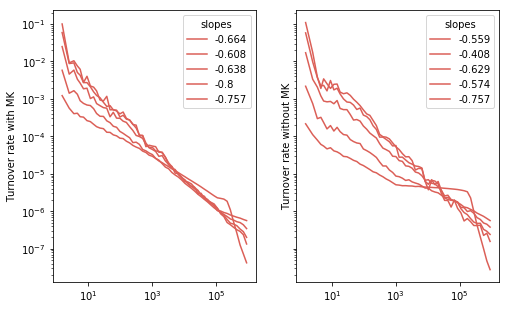

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True,figsize = (8,5))
# 第一个图
fig.subplots_adjust(hspace=0.5)

for _ in sv[:5]:
    i = 0
    c = palette[i]
    data = np.array(_)
#     data = data[data<1e4]
    fit = pwl.Fit(data,xmin = 10,xmax = 1e5)
    fit1= scpl.fit(data)
    
    print(fit.alpha, fit1[0])
    fit.plot_pdf(original_data = True, c = c,
                 label = round(fit1[0]-1,3), ax = ax1)
    ax1.set_ylabel('Turnover rate with MK')
    ax1.legend(title = 'slopes')
    i += 1
    
for _ in sv[5:]:
    i = 0
    c = palette[i]
    data = np.array(_)
#     data = data[data<1e4]
    fit = pwl.Fit(data,xmin = 10,xmax = 1e5)
    fit1= scpl.fit(data)
    
    print(fit.alpha, fit1[0])
    fit.plot_pdf(original_data = True, c = c,
                 label = round(fit1[0]-1,3), ax = ax2)
    ax2.set_ylabel('Turnover rate without MK')
    ax2.legend(title = 'slopes')
    i += 1

1.1759024627275776 0.3356386473662464
1.195731785685254 0.39152942624510845
1.2104694240295082 0.3615461894299246
1.2189443429689069 0.2000997298336697
1.2217654613006745 0.24282114533084104
1.1538068925565976 0.44095995767698637
1.1682743838746479 0.5923525189709546
1.1901578277662554 0.37063627327822485
1.2115930972521796 0.42587708584055517
1.2297150388683862 0.24281013449645758


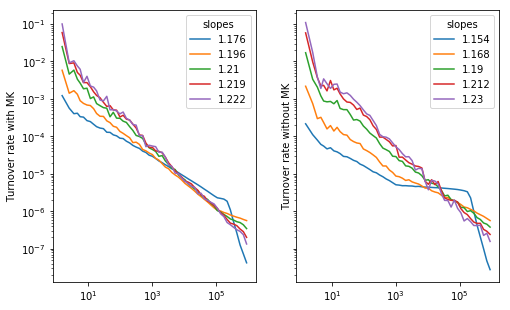

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True,figsize = (8,5))
# 第一个图
fig.subplots_adjust(hspace=0.5)

for _ in sv[:5]:
    i = 0
    c = palette[i]
    data = np.array(_)
#     data = data[data<1e4]
    fit = pwl.Fit(data,xmin = 50,xmax = 1e5)
    fit1= scpl.fit(data)
    
    print(fit.alpha, fit1[0])
    fit.plot_pdf(original_data = True,
                 label = round(fit.alpha,3), ax = ax1)
    ax1.set_ylabel('Turnover rate with MK')
    ax1.legend(title = 'slopes')
    i += 1
    
for _ in sv[5:]:
    i = 0
    c = palette[i]
    data = np.array(_)
#     data = data[data<1e4]
    fit = pwl.Fit(data,xmin = 50,xmax = 1e5)
    fit1= scpl.fit(data)
    
    print(fit.alpha, fit1[0])
    fit.plot_pdf(original_data = True,
                 label = round(fit.alpha,3), ax = ax2)
    ax2.set_ylabel('Turnover rate without MK')
    ax2.legend(title = 'slopes')
    i += 1

In [54]:
from scipy.optimize import curve_fit

In [47]:
c = np.random.randn(100)
a, b = np.histogram(c)

In [48]:
a, b # b是分位点

(array([ 3,  4,  6,  8, 19, 27, 20, 11,  0,  2]),
 array([-3.02624859, -2.47391839, -1.9215882 , -1.369258  , -0.8169278 ,
        -0.26459761,  0.28773259,  0.84006278,  1.39239298,  1.94472317,
         2.49705337]))

In [55]:
def scpl(x, a, b):
    return a * np.power(x, -b)

In [ ]:
# curve_fit
cvft = []
for i in range(10):
    data = sv[i]
    a , b = np.histogram(data, 10000,density = True)
    xs = ( b[:-1] + b[1:] ) / 2
    plt.plot(xs, a, label = i%5)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    popt, pcov = curve_fit(scpl, xs, a)
    cvft.append(popt)
cvft

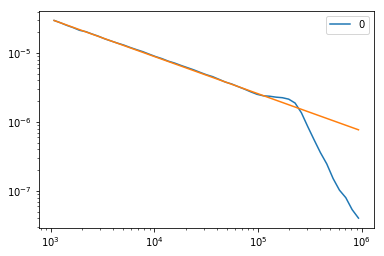

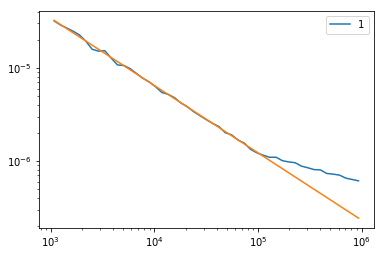

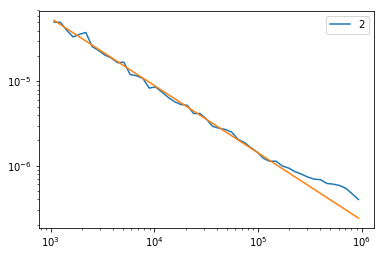

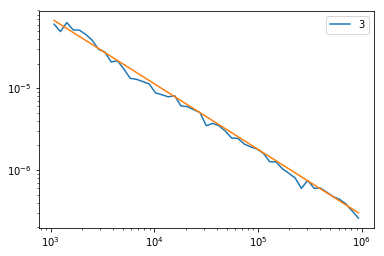

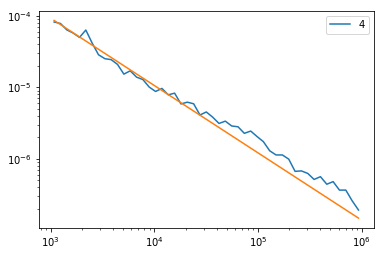

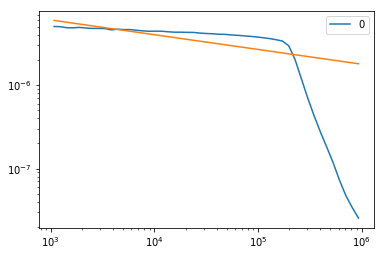

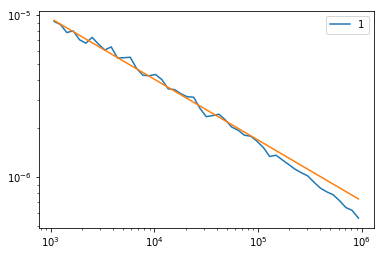

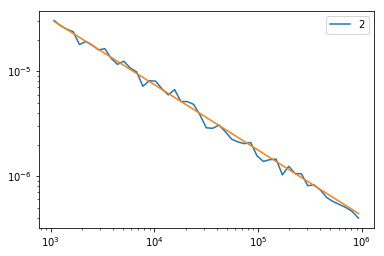

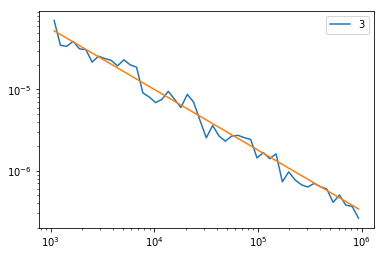

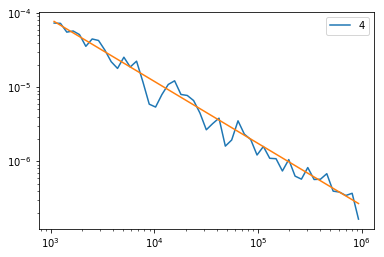

[array([0.00127585, 0.53909868]),
 array([0.00501896, 0.72259699]),
 array([0.01381857, 0.79741206]),
 array([0.01813312, 0.80084161]),
 array([0.06231505, 0.94245322]),
 array([2.04826688e-05, 1.76667522e-01]),
 array([1.26864471e-04, 3.74749975e-01]),
 array([0.00230437, 0.62277248]),
 array([0.00961139, 0.74570423]),
 array([0.02637394, 0.83593867])]

In [85]:
# curve_fit
cvft = []
for i in range(10):
    data = np.array(sv[i])
    data = data[(data<1e6) & (data>1e3)]
    a , b = np.histogram(data, bins = np.logspace(3,6,50) ,density = True)
    xs = ( b[:-1] + b[1:] ) / 2

    plt.plot(xs, a, label = i%5)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    popt, pcov = curve_fit(scpl, xs, a)
    plt.plot(xs, scpl(xs, *popt))
    plt.show()
    cvft.append(popt)
cvft

In [90]:
palette = [(164,208,124),
(135,187,223),
(173,140,175),
(243,141,131),
(250,193,122)]

[array([0.00127585, 0.53909868]),
 array([0.00501896, 0.72259699]),
 array([0.01381857, 0.79741206]),
 array([0.01813312, 0.80084161]),
 array([0.06231505, 0.94245322]),
 array([2.04826688e-05, 1.76667522e-01]),
 array([1.26864471e-04, 3.74749975e-01]),
 array([0.00230437, 0.62277248]),
 array([0.00961139, 0.74570423]),
 array([0.02637394, 0.83593867])]

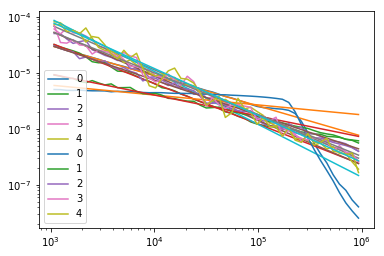

In [87]:
# curve_fit
cvft = []
for i in range(10):
    data = np.array(sv[i])
    data = data[(data<1e6) & (data>1e3)]
    a , b = np.histogram(data, bins = np.logspace(3,6,50) ,density = True)
    xs = ( b[:-1] + b[1:] ) / 2

    plt.plot(xs, a, label = i%5)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    popt, pcov = curve_fit(scpl, xs, a)
    plt.plot(xs, scpl(xs, *popt))
    cvft.append(popt)
cvft

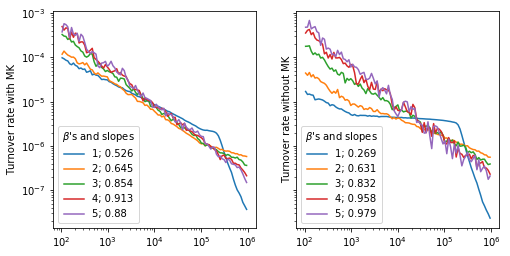

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True, figsize = (8,4))
fig.subplots_adjust(hspace = 0.5)
cvft = []
for i in range(5):
    data = np.array(sv[i])
#     data = data[(data<1e6) & (data>1e3)]
    a , b = np.histogram(data, bins = np.logspace(2,6,100) ,density = True)
    xs = ( b[:-1] + b[1:] ) / 2
    popt, pcov = curve_fit(scpl, xs, a)
    ax1.loglog(xs, a, label = str(i%5 + 1)+'; '+ str(round(popt[1],3)))
#     plt.plot(xs, scpl(xs, *popt))
    cvft.append(popt)
ax1.set_ylabel('Turnover rate with MK')
ax1.legend(title = r'$\beta$'+'\'s and slopes')
    
for i in range(5,10):
    data = np.array(sv[i])
    a , b = np.histogram(data, bins = np.logspace(2,6,100) ,density = True)
    xs = ( b[:-1] + b[1:] ) / 2
    popt, pcov = curve_fit(scpl, xs, a)
    ax2.loglog(xs, a, label = str(i%5 + 1)+'; '+ str(round(popt[1],3)))
#     plt.plot(xs, scpl(xs, *popt))
    cvft.append(popt)
ax2.set_ylabel('Turnover rate without MK')
ax2.legend(title = r'$\beta$'+'\'s and slopes')
plt.savefig('in_one_now_{}.pdf'.format(time.time()))

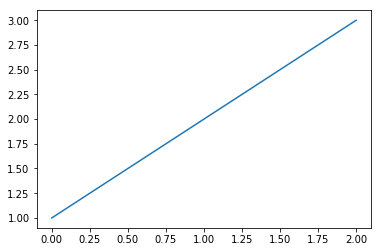

In [100]:
plt.plot([1,2,3],x)